### An implementation of a simple neural network

#### Data Loading and Network Setup

Loading dataset...
Reshaping dataset...
Creating network...
Done


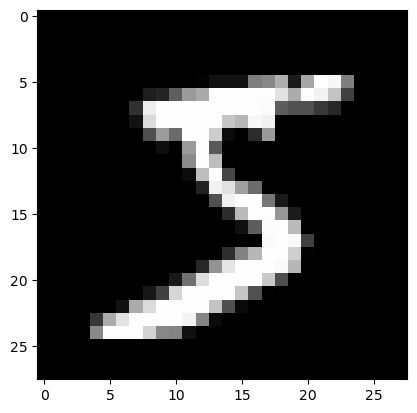

In [23]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from data_loader import MnistDataloader
from IPython.display import display, clear_output

print("Loading dataset...")
mnist_dataloader = MnistDataloader()
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
x_train = np.array(x_train) # 60000 x 28 x 28
y_train = np.array(y_train) # 60000
x_test = np.array(x_test)   # 10000 x 28 x 28
y_test = np.array(y_test)   # 10000

# Show example image
plt.imshow(x_train[0], cmap=plt.cm.gray)

# Convert tensor to lower dimension and normalize
print("Reshaping dataset...")
x_train = x_train.reshape(x_train.shape[0], -1) # 60000 x 784
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], -1)    # 10000 x 784
x_test = x_test / 255.0

# Apply one-hot-coding to labels
y_train_hot = np.zeros((y_train.size, 10))
y_train_hot[np.arange(y_train.size), y_train] = 1   # 60000 x 10
y_test_hot = np.zeros((y_test.size, 10))
y_test_hot[np.arange(y_test.size), y_test] = 1      # 10000 x 10

# Construct network
print("Creating network...")
hidden_neurons = 128
output_neurons = 10
learning_rate = 0.1
weights_h = np.random.randn(x_train.shape[1], hidden_neurons) * 0.01  # 784 x 128
biases_h = np.zeros(hidden_neurons)                                   # 128
weights_o = np.random.randn(hidden_neurons, output_neurons) * 0.01    # 128 x 10
biases_o = np.zeros(output_neurons)
print("Done")

#### Network Training

'Training 59000 of 60000 done.'

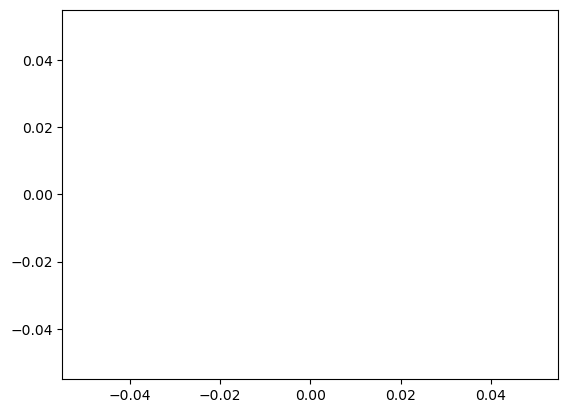

Done


In [38]:
# ReLU activation function
def relu(vector):
    return np.maximum(0, vector)


# Derivative function of ReLU
def relu_derivative(x):
    return (x > 0).astype(float)


# Softmax activation function
def softmax(vector):
    exp_vector = np.exp(vector)
    return exp_vector / np.sum(exp_vector)


# Cross entropy loss function
def ce_loss(output_vector, label_vector):
    return -np.sum(label_vector * np.log(output_vector))

# Run network
losses = []
for index in range(x_train.shape[0]):
    if index % 1000 == 0:
        clear_output(wait=True)
        display(f"Training {index} of {x_train.shape[0]} done.")

    # Forward pass
    hidden_output = relu(np.dot(x_train[index], weights_h) + biases_h)
    output = softmax(np.dot(hidden_output, weights_o) + biases_o)
    losses.append(ce_loss(output, y_train_hot[index]))

    # Backward pass
    # d_output = output - y_train_hot[index]  # Combined derivative of softmax and ce loss
    # d_loss_weights_o = np.outer(hidden_output, d_output)
    # d_output_h = np.dot(weights_o, d_output) * relu_derivative(hidden_output)
    # d_loss_weights_h = np.outer(x_train[index], d_output_h)

    # weights_o -= learning_rate * d_loss_weights_o
    # biases_o -= learning_rate * d_output
    # weights_h -= learning_rate * d_loss_weights_h
    # biases_h -= learning_rate * d_output_h

plt.plot(losses)
plt.show()
print("Done")